In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Preguntas

1- Deberían expandirse a Canadá?

2- ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología.
     
+ Pista: Existen dos experimentos naturales. Canadá y las tiendas que se encuentran lejos. Utilízalos.


### Información releventa en el caso: 

+ While retailers such as Amazon operate exclusively online, legacy retail chains have had to build online channels alongside their brick-and-mortar (B&M) operations.

+ Home and Kitchen, a chain with 84 stores in North America, 67 of which are in the United States and 17 in Canada.

+ Introduced its online store in 2007. Online orders ship to anywhere in the United States or Canada from a central warehouse.

+ Since 2007, the company has had two main divisions: online and brick & mortar, each operated as a profit center.

+ After significant growth over the first five years, the company’s online sales had started to stabilize.

**BOPS** aka Buy Online Pickup at Store

+ Customers were now given the option of picking up their purchases at a nearby store within a given time window. In this way, customers could “book” the product online and then pick it up at a nearby store. 

+ This enabled customers to save on shipping fees and take their purchase home the same day. Schwarz felt BOPS would have great appeal.

+ BOPS was operationally complex. It required that the B&M division provide the online division with real-time store availability data for all stores, and the B&M division had to develop new in-store processes to reliably reserve products in a specific store once a transaction had taken place online.

+ BOPS was launched on October 11, 2011. The Canadian operation had been more reluctant to move ahead with BOPS and by the October launch date its information systems were still not ready to provide real-time inventory status. As a result, the BOPS initiative was only launched in the United States.

**Sales Results**

+ Since the introduction of BOPS sales had declined significantly in both the online and B&M channels.

### Diccionario online sales
+ id (DMA): Designated Market Area (DMA) identification code
+ year: Year
+ month: Month number (January =1)
+ week: Week number (first week of the year = 1)
+ after: Equal to 1 if week is after introduction of BOPS; 0 otherwise
+ close: Equal to 1 if week is DMA is within 50 miles of a store; 0 otherwise

+  sales 	Total online sales for the week for the DMA in dollars

In [23]:
online = pd.read_csv('bops_online.csv', thousands=',')
online.head()

,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,18564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,30883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,37425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,32563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,35773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
online = online[['id (DMA)', 'year', 'month', 'week', 'after', 'close', ' sales ']]

In [25]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
id (DMA)    10710 non-null int64
year        10710 non-null int64
month       10710 non-null int64
week        10710 non-null int64
after       10710 non-null int64
close       10710 non-null int64
 sales      10710 non-null int64
dtypes: int64(7)
memory usage: 585.8 KB


In [33]:
online.columns = ['id_dma', 'year', 'month', 'week', 'after', 'close', 'sales']
online.head()

,id_dma,year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773


The **online sales are disaggregated by the geographical region** from which the website customer originated.

Toward this end, North America was divided into 210 Designated Market Areas (DMAs). A standard geographical unit in marketing, a DMA is a region of the country in which radio and television stations in the major city of the area are seen in homes and households as defined
by Nielsen Media research. 


**B&M sales are disaggregated by store**

### Diccionario b&m sales

+ id (store): Store identification code
+ year: Year
+ month: Month (January = 1)
+ week: Week (first week of the year = 1)
+ usa: Equal to 1 if store is in the USA; 0 if it is a Canadian store
+ after: Equal to 1 if week is after introduction of BOPS; 0 otherwise
+ sales: Total B&M sales for the week for the store

In [29]:
b_m = pd.read_csv('bops_bm.csv', thousands=',')
b_m.head()

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0,NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0,NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0,NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0,NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0,NaN,NaN,NaN,NaN


In [30]:
b_m.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales ',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [31]:
b_m = b_m[['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales ']]
b_m.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales '], dtype='object')

In [32]:
b_m.columns = ['id_store', 'year', 'month', 'week', 'usa', 'after', 'sales']
b_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 7 columns):
id_store    4536 non-null float64
year        4536 non-null float64
month       4536 non-null float64
week        4536 non-null float64
usa         4536 non-null float64
after       4536 non-null float64
sales       4536 non-null float64
dtypes: float64(7)
memory usage: 248.2 KB


### Exploramos sales

Primero, quiero ver si las sales de cada tipo realmente cambiaron a partir de que se introdujo bops. 

Como online y b&m sales tienen distintos niveles de agregación y como no hay manera directa de ligar DMAs con tiendas, vamos a contar las sales por semana.  

Haría sentido ver la correlación entre las series? 

Cómo mido el impacto de bops en dólares?

### Ventas semanales online

In [35]:
online.describe()

,id_dma,year,month,week,after,close,sales
count,10710.000000,10710.000000,10710.000000,10710.00000,10710.000000,10710.000000,10710.000000
mean,105.500000,2011.274510,6.450980,27.45098,0.490196,0.480952,13755.704855
std,60.623921,0.446288,3.533278,15.42074,0.499927,0.499660,22411.737794
min,1.000000,2011.000000,1.000000,1.00000,0.000000,0.000000,63.000000
25%,53.000000,2011.000000,3.000000,13.00000,0.000000,0.000000,1144.000000
50%,105.500000,2011.000000,7.000000,28.00000,0.000000,0.000000,5567.500000
75%,158.000000,2012.000000,10.000000,41.00000,1.000000,1.000000,17185.750000
max,210.000000,2012.000000,12.000000,53.00000,1.000000,1.000000,319233.000000


In [37]:
online.head()

,id_dma,year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773


In [52]:
sum_weekly_sales = (
             online
            .groupby(['year', 'month', 'week', 'after'])['sales']
            .sum()
            .reset_index()   
)
sum_weekly_sales['sales_millions'] = np.round(sum_weekly_sales.sales/1000000, 2)

sum_weekly_sales

,year,month,week,after,sales,sales_millions
0,2011,4,17,0,3031382,3.03
1,2011,4,18,0,3184999,3.18
2,2011,5,19,0,3503112,3.50
3,2011,5,20,0,3394319,3.39
4,2011,5,21,0,3734255,3.73
5,2011,5,22,0,3135038,3.14
6,2011,5,23,0,3425560,3.43
7,2011,6,24,0,3276717,3.28
8,2011,6,25,0,3436992,3.44
9,2011,6,26,0,3267897,3.27


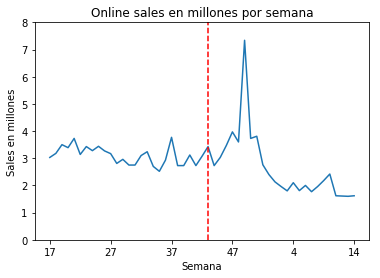

In [68]:
#sum_weekly_sales

plt.plot(sum_weekly_sales.sales_millions)
plt.axvline(x = 26, ls = '--', c = 'red')
plt.xlabel('Semana')
plt.ylabel('Sales en millones')
plt.ylim([0, 8])
plt.xticks(range(0, 51, 10),[sum_weekly_sales.loc[0, 'week'],
                            sum_weekly_sales.loc[10, 'week'],
                            sum_weekly_sales.loc[20, 'week'],
                            sum_weekly_sales.loc[30, 'week'],
                            sum_weekly_sales.loc[40, 'week'],
                            sum_weekly_sales.loc[50, 'week']] )
plt.title('Online sales en millones por semana')
#plt.legend()
plt.show()

En rojo se marca la fecha a partir de la cual empieza BOPS. 

### Ventas semanales B&M

In [69]:
b_m.head()

,id_store,year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0


In [72]:
sum_weekly_sales_bm = (b_m
                       .groupby(['year', 'month', 'week','usa','after'])['sales']
                       .sum()
                       .reset_index()


)
sum_weekly_sales_bm['sales_millions'] = np.round(sum_weekly_sales_bm.sales/1000000, 2)
sum_weekly_sales_bm

,year,month,week,usa,after,sales,sales_millions
0,2011.0,4.0,16.0,0.0,0.0,1042705.0,1.04
1,2011.0,4.0,16.0,1.0,0.0,4058455.0,4.06
2,2011.0,4.0,17.0,0.0,0.0,953903.0,0.95
3,2011.0,4.0,17.0,1.0,0.0,3583266.0,3.58
4,2011.0,4.0,18.0,0.0,0.0,1227311.0,1.23
5,2011.0,4.0,18.0,1.0,0.0,4801605.0,4.80
6,2011.0,5.0,19.0,0.0,0.0,1062125.0,1.06
7,2011.0,5.0,19.0,1.0,0.0,4485636.0,4.49
8,2011.0,5.0,20.0,0.0,0.0,1100398.0,1.10
9,2011.0,5.0,20.0,1.0,0.0,4957423.0,4.96


In [79]:
sum_weekly_sales_bm_usa = sum_weekly_sales_bm[sum_weekly_sales_bm.usa == 1].reset_index()
sum_weekly_sales_bm_usa

,index,year,month,week,usa,after,sales,sales_millions
0,1,2011.0,4.0,16.0,1.0,0.0,4058455.0,4.06
1,3,2011.0,4.0,17.0,1.0,0.0,3583266.0,3.58
2,5,2011.0,4.0,18.0,1.0,0.0,4801605.0,4.80
3,7,2011.0,5.0,19.0,1.0,0.0,4485636.0,4.49
4,9,2011.0,5.0,20.0,1.0,0.0,4957423.0,4.96
5,11,2011.0,5.0,21.0,1.0,0.0,4658070.0,4.66
6,13,2011.0,5.0,22.0,1.0,0.0,4546124.0,4.55
7,15,2011.0,5.0,23.0,1.0,0.0,4875298.0,4.88
8,17,2011.0,6.0,24.0,1.0,0.0,4551971.0,4.55
9,19,2011.0,6.0,25.0,1.0,0.0,5326411.0,5.33


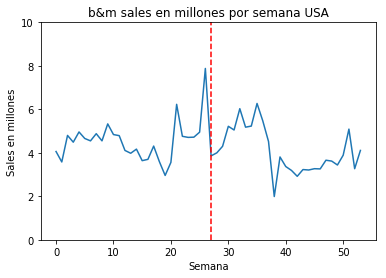

In [83]:
plt.plot(sum_weekly_sales_bm_usa.sales_millions)
plt.axvline(x = 27, ls = '--', c = 'red')
plt.xlabel('Semana')
plt.ylabel('Sales en millones')
plt.ylim([0, 10])
#plt.xticks(range(0, 51, 10),[sum_weekly_sales.loc[0, 'week'],
#                            sum_weekly_sales.loc[10, 'week'],
#                            sum_weekly_sales.loc[20, 'week'],
#                            sum_weekly_sales.loc[30, 'week'],
#                            sum_weekly_sales.loc[40, 'week'],
#                            sum_weekly_sales.loc[50, 'week']] )
plt.title('b&m sales en millones por semana USA')
#plt.legend()
plt.show()

In [80]:
sum_weekly_sales_bm_can = sum_weekly_sales_bm[sum_weekly_sales_bm.usa == 0].reset_index()
sum_weekly_sales_bm_can

,index,year,month,week,usa,after,sales,sales_millions
0,0,2011.0,4.0,16.0,0.0,0.0,1042705.0,1.04
1,2,2011.0,4.0,17.0,0.0,0.0,953903.0,0.95
2,4,2011.0,4.0,18.0,0.0,0.0,1227311.0,1.23
3,6,2011.0,5.0,19.0,0.0,0.0,1062125.0,1.06
4,8,2011.0,5.0,20.0,0.0,0.0,1100398.0,1.10
5,10,2011.0,5.0,21.0,0.0,0.0,1189257.0,1.19
6,12,2011.0,5.0,22.0,0.0,0.0,1142033.0,1.14
7,14,2011.0,5.0,23.0,0.0,0.0,1080402.0,1.08
8,16,2011.0,6.0,24.0,0.0,0.0,1065123.0,1.07
9,18,2011.0,6.0,25.0,0.0,0.0,1353870.0,1.35


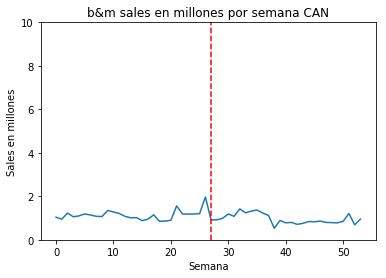

In [85]:
plt.plot(sum_weekly_sales_bm_can.sales_millions)
plt.axvline(x = 27, ls = '--', c = 'red')
plt.xlabel('Semana')
plt.ylabel('Sales en millones')
plt.ylim([0, 10])
#plt.xticks(range(0, 51, 10),[sum_weekly_sales.loc[0, 'week'],
#                            sum_weekly_sales.loc[10, 'week'],
#                            sum_weekly_sales.loc[20, 'week'],
#                            sum_weekly_sales.loc[30, 'week'],
#                            sum_weekly_sales.loc[40, 'week'],
#                            sum_weekly_sales.loc[50, 'week']] )
plt.title('b&m sales en millones por semana CAN')
#plt.legend()
plt.show()

### Respuesta 1

No haría expansión a Canadá por las ventas son menores en comparación a las de USA y realmente no se observa un cambio en las ventas tras la implementación de BOPS. 

### Respuesta 2

QUizá muy elevado, pero podríamos implementar un **modelo causal** para medir el impacto de la implementación. Es decir, analizar qué hubiera pasado en las fechas después de la implementación si se seguía con el mismo patrón de antes vs lo que realmente pasó. 